In [3]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import os
from os.path import join as oj
out_dir = '../results/illustrate'
os.makedirs(out_dir, exist_ok=True)

In [4]:
cred = (234/255, 51/255, 86/255)
cblue = (57/255, 138/255, 242/255)

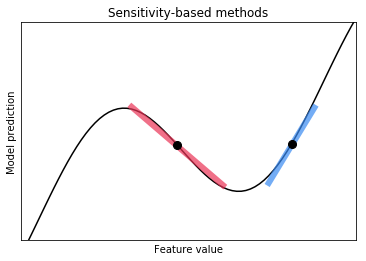

In [5]:
# plot generating function
x = np.linspace(-1.5, 1, 100)
y = np.sin((x + 1) * 4) + x * 1.2

# make plot
plt.plot(x, y, color='black')
plt.title('Sensitivity-based methods')
plt.xlabel('Feature value')
plt.ylabel('Model prediction')
plt.xticks([])
plt.yticks([])

# draw dashed lines
plt.plot([x[40], x[60]], [y[40] + 0.03, y[60] + 0.03], '-', alpha=0.7, lw=6, color=cred)
plt.plot([x[70], x[80]], [y[70] - 0.1, y[80] - 0.1], '-', alpha=0.7, lw=6, color=cblue)
# plt.plot([x[28], x[75]], [y[28], y[75]], '-', alpha=0.25, lw=6, color='gray')
# plt.plot([x[20], x[83]], [y[20], y[83]], '-', alpha=0.7, lw=6, color=cblue)

plt.xlim((-1.1, 0.75))
plt.ylim((-1.5, 1.5))

# point to explain
plt.plot(x[50], y[50], 'o', color='black', ms=8)
plt.plot(x[75], y[75], 'o', color='black', ms=8)

plt.savefig(oj(out_dir, 'fig_sensitivity_based.pdf'))
plt.show()

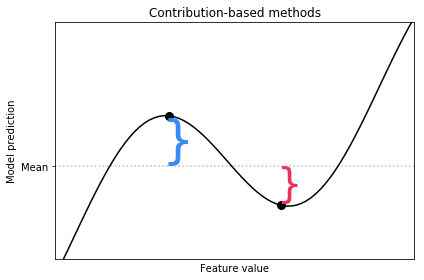

In [6]:
# make plot
plt.title('Contribution-based methods')
plt.xlabel('Feature value')

plt.axhline(np.mean(y), linestyle=':', alpha=0.5, color='gray')
plt.annotate(r"$\}$", fontsize=51, color=cblue,
             xy=(0.38, 0.44), xycoords='figure fraction'
            )

plt.plot(x, y, color='black')
# idxs = np.abs(y - np.mean(y)) < 0.05
# plt.plot(x[idxs], y[idxs], 'o', color='black', ms=8)
plt.plot(x[39], y[39], 'o', color='black', ms=8)
plt.plot(x[62], y[62], 'o', color='black', ms=8)

plt.annotate(r"$\}$", fontsize=40, color=cred,
             xy=(0.65, 0.30), xycoords='figure fraction'
            )
plt.ylabel('Model prediction')

plt.xticks([])
plt.yticks([np.mean(y)], labels=['Mean'])
plt.xlim((-1.1, 0.75))
plt.ylim((-1.5, 1.5))

plt.tight_layout()
plt.savefig(oj(out_dir, 'fig_contribution_based.pdf'))
plt.show()

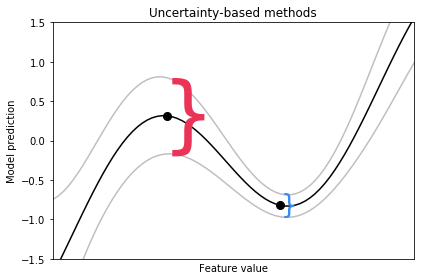

In [7]:
# make plot
plt.title('Uncertainty-based methods')
plt.xlabel('Feature value')

plt.annotate(r"$\}$", fontsize=83, color=cred,
             xy=(0.38, 0.495), xycoords='figure fraction',
             stretch=1000.0, style='oblique', weight='ultralight',
             family='serif',
            )

plt.plot(x, y, color='black')
yerr = (np.sin(y) + 1) / 4 + 0.0002 * np.exp(-4 * (x-1)) + 0.07
plt.plot(x, y - yerr, color='gray', alpha=0.5)
plt.plot(x, y + yerr, color='gray', alpha=0.5)
plt.plot(x[39], y[39], 'o', color='black', ms=8)
plt.plot(x[62], y[62], 'o', color='black', ms=8)

plt.annotate(r"$\}$", fontsize=26, color=cblue,
             xy=(0.66, 0.24), xycoords='figure fraction', #stretch=2.0
            )
plt.ylabel('Model prediction')

plt.xticks([])
plt.xlim((-1.1, 0.75))
plt.ylim((-1.5, 1.5))

plt.tight_layout()
plt.savefig(oj(out_dir, 'fig_uncertainty_based.pdf'))
plt.show()

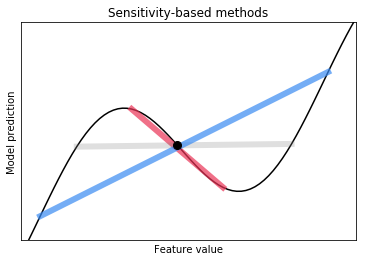

In [8]:
# plot generating function
x = np.linspace(-1.5, 1, 100)
y = np.sin((x + 1) * 4) + x * 1.2

# make plot
plt.plot(x, y, color='black')
plt.title('Sensitivity-based methods')
plt.xlabel('Feature value')
plt.ylabel('Model prediction')
plt.xticks([])
plt.yticks([])

# draw dashed lines
plt.plot([x[40], x[60]], [y[40], y[60]], '-', alpha=0.7, lw=6, color=cred)
plt.plot([x[28], x[75]], [y[28], y[75]], '-', alpha=0.25, lw=6, color='gray')
plt.plot([x[20], x[83]], [y[20], y[83]], '-', alpha=0.7, lw=6, color=cblue)

plt.xlim((-1.1, 0.75))
plt.ylim((-1.5, 1.5))

# point to explain
plt.plot(x[50], y[50], 'o', color='black', ms=8)

plt.savefig(oj(out_dir, 'fig_local_errs.pdf'))
plt.show()

# demonstrate OOD sampling issues

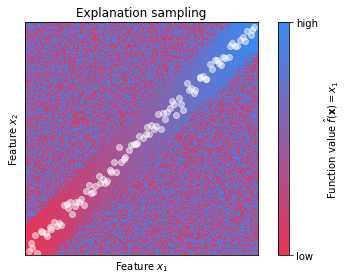

In [9]:
cm = LinearSegmentedColormap.from_list('br', [cred, cblue], N=100)

# Make data.
N = 200
step = 2
zs = np.zeros((N, N))


for r in range(zs.shape[0]):
    for c in range(zs.shape[1]):
        zs[r, c] = c / zs.shape[1]
        if np.abs(r - c) < 25 + np.random.randn() * 3:
            pass
        else:
#             kernel = np.exp(np.abs(r - c) / 100) #np.sin(R)
#             if np.random.randn() > 0.5: 
            zs[r, c] = np.random.rand() #zs[r, c]  
plt.imshow(zs, cmap=cm)

x = np.arange(0, N, step) + np.abs(np.random.randn(N // step))
y = x + np.random.randn(N // step) * 5
# x[x < 0] = 50
# x[x >= N - 1] = 50
# y[y < ]
plt.plot(x, y, 'o', alpha=0.5, color='white')
plt.xlim((0, N))
plt.ylim((0, N))
plt.xticks([])
plt.yticks([])
plt.xlabel('Feature $x_1$')
plt.ylabel('Feature $x_2$')
plt.title('Explanation sampling')
cbar = plt.colorbar(label='Function value $\hat{f}(\mathbf{x}) = x_1 $', ticks=[0, 1], cmap=cm)
cbar.ax.set_yticklabels(['low', 'high'])  # vertically oriented colorbar

plt.tight_layout()
plt.savefig(oj(out_dir, 'fig_sampling.pdf'))
plt.show()

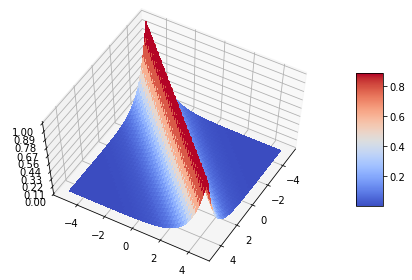

In [41]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.exp(-1 * np.abs(X-Y)) #np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
# ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.view_init(elev=60, azim=30)

plt.tight_layout()
plt.show()